# Laptop Analysis

I have conducted a comprehensive analysis of a dataset containing various laptop attributes. The dataset is publicly available on [Kaggle](https://www.kaggle.com/datasets/owm4096/laptop-prices). After installing and importing the necessary libraries, I thoroughly examined the data to uncover correlations and other key insights.


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Inspecting DataFrame Structure and Content

To quickly inspect the structure and content of a DataFrame, you can use `df.info()`. Below is an example of how to load the dataset and check its structure:


In [86]:
# Use df.info() to quickly inspect DataFrame structure and content.
df=pd.read_csv('laptop_prices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product Id            1275 non-null   int64  
 1   Company               1275 non-null   object 
 2   Product               1275 non-null   object 
 3   TypeName              1275 non-null   object 
 4   Inches                1275 non-null   float64
 5   Ram                   1275 non-null   int64  
 6   OS                    1275 non-null   object 
 7   Weight                1275 non-null   float64
 8   Price_euros           1275 non-null   float64
 9   Screen                1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [87]:
# df.describe(include='all')
# df.shape
# df

### Counting Missing Values as a Percentage

In [73]:
# Use df.isnull().sum() to count the number of missing values in each column as a percentage

missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Product Id              0.0
Company                 0.0
Product                 0.0
TypeName                0.0
Inches                  0.0
Ram                     0.0
OS                      0.0
Weight                  0.0
Price_euros             0.0
Screen                  0.0
ScreenW                 0.0
ScreenH                 0.0
Touchscreen             0.0
IPSpanel                0.0
RetinaDisplay           0.0
CPU_company             0.0
CPU_freq                0.0
CPU_model               0.0
PrimaryStorage          0.0
SecondaryStorage        0.0
PrimaryStorageType      0.0
SecondaryStorageType    0.0
GPU_company             0.0
GPU_model               0.0
CPU_freq_group          0.0
Screen_size_group       0.0
Weight_group            0.0
dtype: float64


### Average Price by Company

To analyze the average price for each company, we group the data by the 'Company' column and calculate the mean of 'Price_euros' for each group. The results are then sorted in descending order to identify the companies with the highest average prices.


In [74]:
# Show the average price for each company in descending order
df_grouped=df.groupby('Company')['Price_euros'].mean().round(0).sort_values(ascending=False).reset_index()
df_grouped

,Company,Price_euros
0,Razer,3346.0
1,LG,2099.0
2,MSI,1729.0
3,Google,1678.0
4,Microsoft,1612.0
5,Apple,1564.0
6,Huawei,1424.0
7,Samsung,1413.0
8,Toshiba,1268.0
9,Dell,1199.0


### Plotting the Average Price by Company

We plot a bar chart to visualize the average price of laptops for each company. The chart uses the `Price_euros` on the x-axis and the `Company` on the y-axis. Additionally, titles and labels are added for clarity, and the layout is adjusted to ensure the plot fits well.



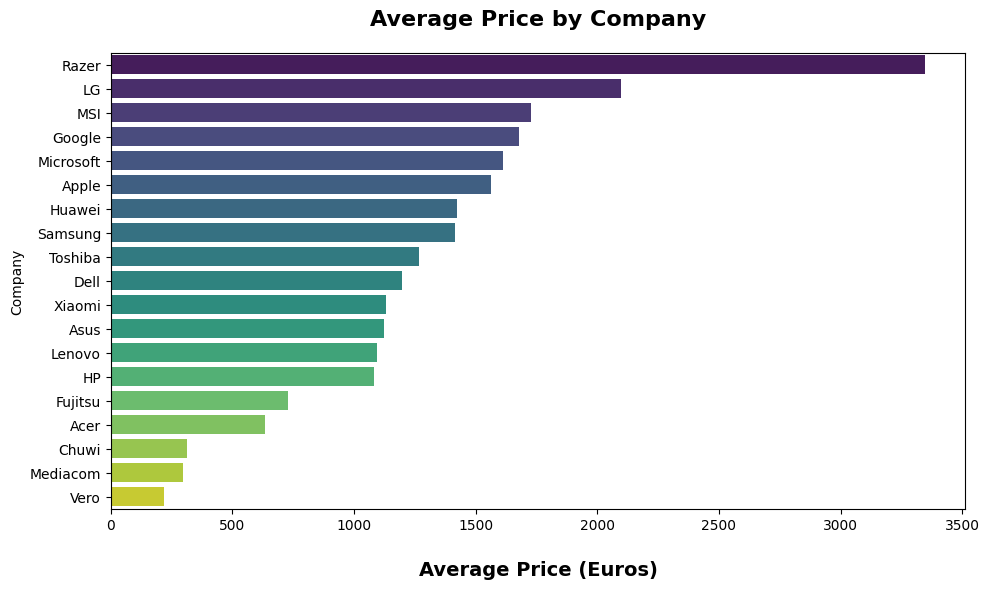

In [88]:
# Plotting the bar chart for the average price
plt.figure(figsize=(10, 6))
sns.barplot(x='Price_euros', y='Company', data=df_grouped, palette='viridis')

# Adding titles and labels
plt.title('Average Price by Company', fontsize=16, weight='bold', pad=20)
plt.xlabel('Average Price (Euros)', fontsize=14, weight='bold', labelpad=20)

# Display the plot
plt.tight_layout()
plt.show()

### Price Distribution by Laptop Type

This boxplot visualizes the distribution of laptop prices across different laptop types. It helps identify price ranges, medians, and potential outliers within each type. The x-axis represents the laptop types, while the y-axis shows the corresponding price in euros.


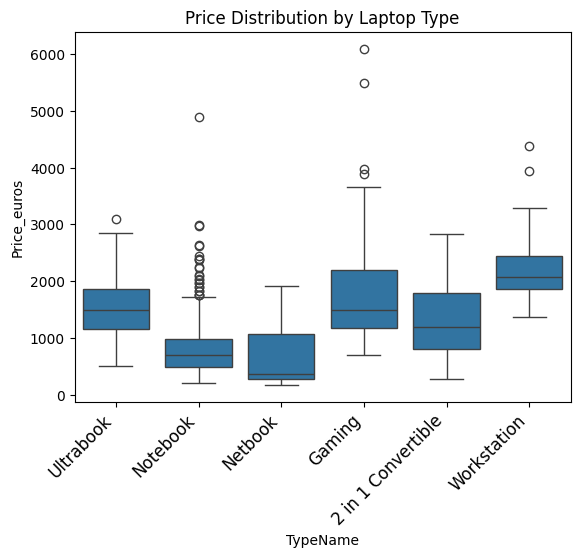

<Figure size 1400x800 with 0 Axes>

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to check distribution of prices by laptop type
sns.boxplot(x='TypeName', y='Price_euros', data=df)
plt.title('Price Distribution by Laptop Type')

# Rotate the x-axis labels and adjust the spacing between them
plt.xticks(rotation=45, ha='right', fontsize=12)

# Increase the figure size to provide more space for the labels
plt.figure(figsize=(14, 8))

# Apply tight layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


Gaming laptops and workstations have the highest price ranges, with gaming laptops showing the most variability and several outliers indicating premium models. Ultrabooks also command a high price, with a more consistent distribution compared to gaming laptops. In contrast, netbooks are the most affordable, with a narrow price range, catering to budget-conscious buyers. Notebooks and 2-in-1 convertibles fall in the mid-range category, with 2-in-1 convertibles priced slightly higher on average. This distribution highlights clear segmentation opportunities, allowing us to target high-end users with premium products and budget-conscious customers with affordable options.

### Analyzing the Relationship Between CPU Frequency and Price

To explore the correlation between CPU frequency and price, we categorize the CPU frequencies into three groups: low, medium, and high. We then calculate the average price for each group to understand if there's a trend related to CPU frequency.


In [114]:
# Creating bins for CPU frequency and calculating the average price for each CPU frequency group to see if there is a correlation
cpu_freq  = np.linspace(df['CPU_freq'].min(), df['CPU_freq'].max(), 4)
group_names = ['low', 'medium', 'high']
df['CPU_freq_group'] = pd.cut(df['CPU_freq'], cpu_freq, labels=group_names)
result = df.groupby('CPU_freq_group')['Price_euros'].mean().round(0).reset_index()
result.columns = ['CPU_freq_group', 'Average_Price']
result

,CPU_freq_group,Average_Price
0,low,817.0
1,medium,1088.0
2,high,1757.0


### Visualizing the Distribution of CPU Frequency Groups Across Laptop Types

This analysis creates a stacked bar chart to show the distribution of different CPU frequency groups (low, medium, and high) across various laptop types. The visualization helps identify trends in how CPU frequency is distributed among different laptop categories.


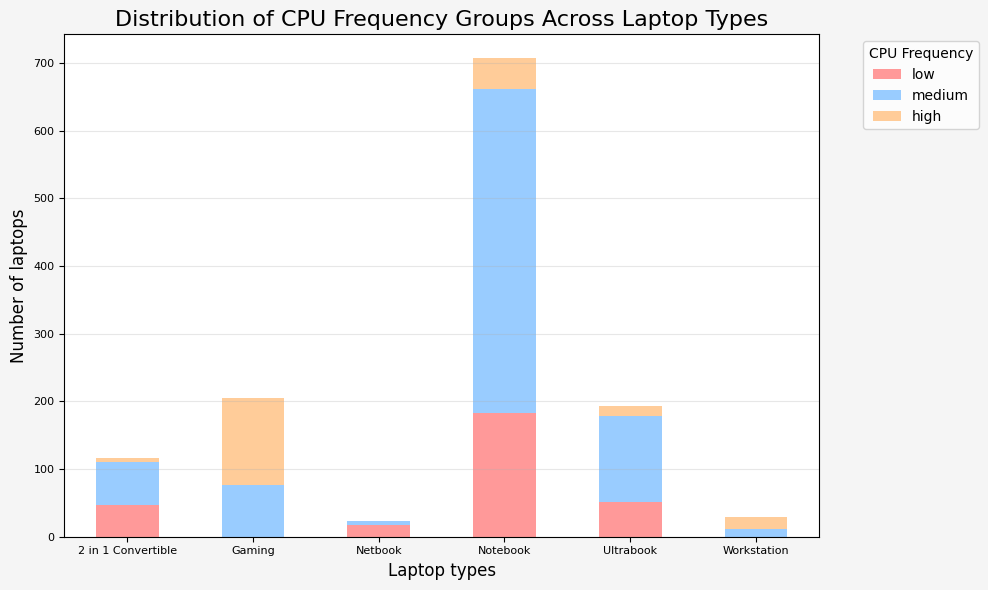

In [129]:

# Prepare data for the stacked bar chart
stacked_data = pd.crosstab(df['TypeName'], df['CPU_freq_group'])

# Create a stacked bar chart
colors = ['#FF9999', '#99CCFF', '#FFCC99']
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)



# Add labels and title
plt.title('Distribution of CPU Frequency Groups Across Laptop Types', fontsize=16)
plt.xlabel('Laptop types', fontsize=12)
plt.ylabel('Number of laptops', fontsize=12)
plt.xticks(fontsize=8, rotation=0, ha='center')
plt.yticks(fontsize=8)
plt.legend(title='CPU Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)  # Add a light grid for readability
plt.tight_layout()  # Adjust layout for better display



# Change the background color
fig = plt.gcf()  # Get current figure
fig.patch.set_facecolor('whitesmoke')  # Change figure background color to 'whitesmoke'


plt.show()

### Checking the Connection Between Screen Size and Weight

This analysis explores the relationship between laptop screen size and weight. By calculating the average weight for each screen size and plotting it with a regression line, we can observe any potential linear correlation between these two attributes.


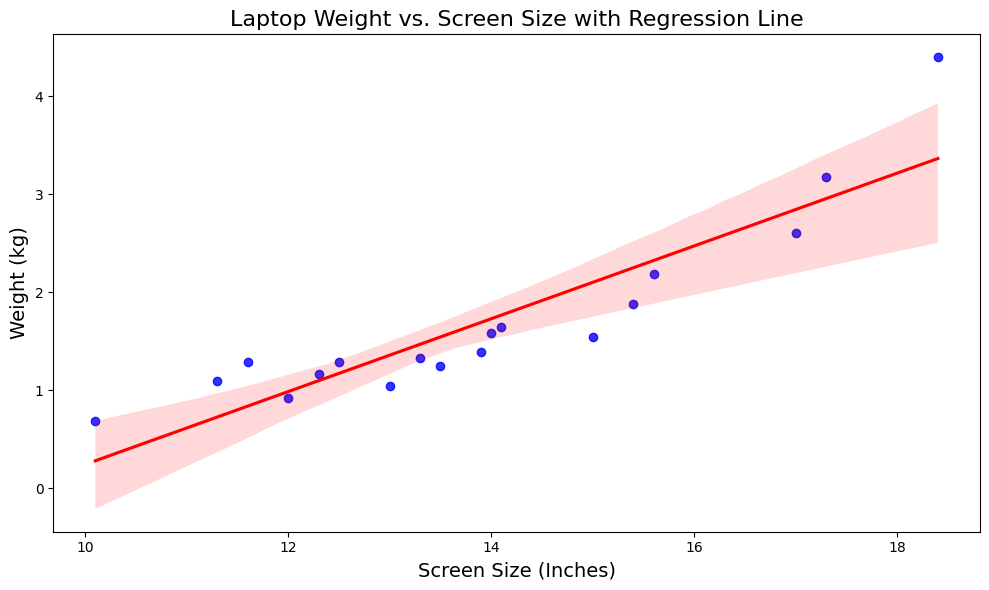

In [128]:
#Checking the connection between screen size and weight
df_screen_weight=df.groupby('Inches')['Weight'].mean().sort_values(ascending=False).reset_index()

# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Inches', y='Weight', data=df_screen_weight, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Adding title and labels
plt.title('Laptop Weight vs. Screen Size with Regression Line', fontsize=16)
plt.xlabel('Screen Size (Inches)', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)

# Displaying the plot
plt.tight_layout()
plt.show()


### Visualizing the Correlation Matrix

This heatmap visualizes the correlation matrix for selected features, including CPU frequency, price, weight, and screen size, to better understand their relationships.

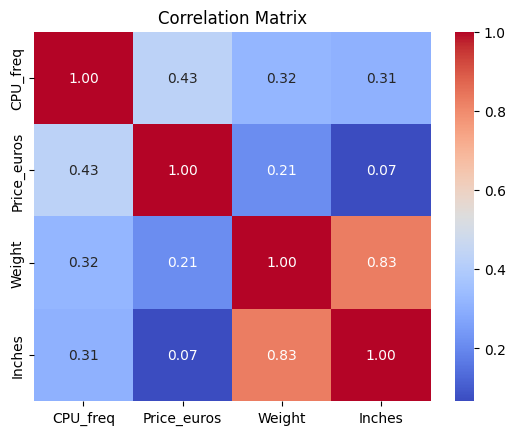

In [126]:
correlation_matrix = df[['CPU_freq', 'Price_euros', 'Weight', 'Inches']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Finding the Lightest Laptops with Specific Features (Imaginary Scenario)

For customers seeking a lightweight laptop with Windows, an i5 or i7 CPU, and either an AMD or Nvidia GPU, this analysis identifies the top 10 lightest options. By filtering for these key specifications, we help customers narrow down their choices to the best-fitting laptops for their needs.


In [127]:
# Finding the lightest notebooks with Windows, i5 or i7 CPU, and either AMD or Nvidia GPU.

columns_to_drop = ['SecondaryStorage', 'SecondaryStorageType', 'ScreenW', 'ScreenH', 'RetinaDisplay', 'Screen_size_group', 'Weight_group', 'CPU_freq']

df_win = df[(df['OS'].str.contains('Windows'))]
df_win = df_win.drop(columns = columns_to_drop)
df_win = df_win[df_win['CPU_model'].str.contains('i5|i7', case=False, na=False)]
df_win = df_win[df_win['GPU_company'].str.contains('AMD|Nvidia')]
df_win = df_win.sort_values(by='Weight').head(10)

df_win

,Product Id,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,Touchscreen,IPSpanel,CPU_company,CPU_model,PrimaryStorage,PrimaryStorageType,GPU_company,GPU_model,CPU_freq_group
874,875,Samsung,Notebook 9,Ultrabook,15.0,16,Windows 10,1.23,1849.00,Full HD,No,No,Intel,Core i7 7500U,256,SSD,Nvidia,GeForce 940MX,medium
877,878,Xiaomi,Mi Notebook,Ultrabook,13.3,8,Windows 10,1.28,935.00,Full HD,No,Yes,Intel,Core i5 6200U,256,SSD,Nvidia,GeForce 940MX,medium
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,1.30,1495.00,Full HD,No,No,Intel,Core i7 8550U,512,SSD,Nvidia,GeForce MX150,low
107,108,Asus,UX430UQ-GV209R (i7-7500U/8GB/256GB/GeForce,Ultrabook,14.0,8,Windows 10,1.30,1193.00,Full HD,No,Yes,Intel,Core i7 7500U,256,SSD,Nvidia,GeForce 940MX,medium
103,104,HP,Envy 13-ad009n,Ultrabook,13.3,8,Windows 10,1.38,1119.00,Full HD,No,Yes,Intel,Core i7 7500U,256,SSD,Nvidia,GeForce MX150,medium
1093,1094,Dell,Inspiron 5370,Ultrabook,13.3,4,Windows 10,1.40,818.35,Full HD,No,Yes,Intel,Core i5 8250U,256,SSD,AMD,Radeon 530,low
71,72,Dell,Inspiron 5370,Ultrabook,13.3,8,Windows 10,1.40,955.00,Full HD,No,Yes,Intel,Core i7 8550U,256,SSD,AMD,Radeon 530,low
215,216,Dell,Inspiron 5370,Ultrabook,13.3,8,Windows 10,1.40,931.88,Full HD,No,Yes,Intel,Core i7 8550U,256,SSD,AMD,Radeon 530,low
847,848,Asus,ZenBook UX310UQ-GL026T,Ultrabook,13.3,8,Windows 10,1.45,1026.00,Full HD,No,Yes,Intel,Core i5 6200U,512,SSD,Nvidia,GeForce 940M,medium
782,783,Toshiba,Tecra Z40-C-161,Ultrabook,14.0,16,Windows 10,1.47,1764.00,Full HD,No,Yes,Intel,Core i7 6600U,512,SSD,Nvidia,GeForce 930M,medium


#EXPLANATION NEEDED

### Finding the Cheapest Product with the Greatest Storage and Screen Size

This analysis identifies the least expensive laptop with the largest storage and screen size by first determining the maximum values for both attributes, filtering the dataset, and sorting by price.


In [122]:
# Finding the cheapest product with the greatest storage and screen size
max_storage = df['PrimaryStorage'].max()
broader_df = df[df['PrimaryStorage'] == max_storage]

max_screen = broader_df['Inches'].max()
filtered_df = broader_df[broader_df['Inches'] == max_screen].sort_values(by='Price_euros')

cleaned_df = filtered_df.drop(columns=columns_to_drop)
cleaned_df



,Product Id,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,Touchscreen,IPSpanel,CPU_company,CPU_freq,CPU_model,PrimaryStorage,PrimaryStorageType,GPU_company,GPU_model,CPU_freq_group
688,689,HP,17-Y002nv (A10-9600P/6GB/2TB/Radeon,Notebook,17.3,6,Windows 10,2.65,569.00,Full HD,No,Yes,AMD,2.4,A10-Series 9600P,2048,HDD,AMD,Radeon R7 M440,medium
709,710,HP,17-ak002nv (A10-9620P/6GB/2TB/Radeon,Notebook,17.3,6,Windows 10,2.71,655.01,Full HD,No,Yes,AMD,2.5,A10-Series 9620P,2048,HDD,AMD,Radeon 530,medium
171,172,HP,17-bs001nv (i5-7200U/6GB/2TB/Radeon,Notebook,17.3,6,Windows 10,2.71,699.00,Full HD,No,Yes,Intel,2.5,Core i5 7200U,2048,HDD,AMD,Radeon 520,medium
279,280,Lenovo,IdeaPad 320-17IKBR,Notebook,17.3,8,No OS,2.80,849.00,Full HD,No,No,Intel,1.8,Core i7 8550U,2048,HDD,Nvidia,GeForce MX150,low


### Analyzing Laptop Type Count for Selected Screen Types

In this analysis, we aim to observe the count of 'Gaming' and 'Ultrabook' laptops for selected screen types. We create dummy variables for the 'TypeName' directly in the dataframe, group by screen type, and then filter the results to focus on laptops with screen types such as '4K Ultra HD' or 'Quad HD+'.


In [116]:
# Create dummy columns for 'TypeName' and group by 'Screen'
df_screentype = pd.concat([df[['Screen']], pd.get_dummies(df['TypeName'])], axis=1)
df_screentype = df_screentype.groupby('Screen').sum().reset_index()

# Filter based on selected screen types
df_screentype = df_screentype[df_screentype['Screen'].str.contains('4K Ultra HD|Quad HD+')]

# Keep relevant columns
df_screentype = df_screentype[['Screen', 'Gaming', 'Ultrabook']]

df_screentype

,Screen,Gaming,Ultrabook
0,4K Ultra HD,13,8
2,Quad HD+,0,18


### Analyzing Laptop Type Count for Selected Screen Types (Alternative Method)

In this alternative analysis, we aim to count the occurrences of 'Gaming' and 'Ultrabook' laptops across different screen types, without splitting the 'Screen' column. We filter the dataset for relevant types, group by screen, and count the occurrences of each laptop type.


In [ ]:
#Alternative: We want to see the count of 'Gaming' and 'Ultrabook' without splitting the 'Screen' column

# Filter for Gaming and Ultrabook types, then group by 'Screen' and count occurrences
df_altscreentype = df[df['TypeName'].isin(['Gaming', 'Ultrabook'])]
df_altscreentype = df_altscreentype.groupby('Screen')['TypeName'].value_counts().unstack(fill_value=0)

# Filter for '4K Ultra HD' or 'Quad HD+' screens
df_altscreentype = df_altscreentype[df_altscreentype.index.str.contains('4K Ultra HD|Quad HD+')]

# Sum the counts of 'Gaming' and 'Ultrabook'
df_altscreentype = df_altscreentype[['Gaming', 'Ultrabook']].sum().reset_index()
df_altscreentype.columns = ['Type', 'Count']

df_altscreentype

,Type,Count
0,Gaming,13
1,Ultrabook,26
